Name Ihunwo owhonda

Labpartner(s)

In [62]:
#import statements go here
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Class 12.2

# Warmup 12.2

Kelsey and Asante are going to demo ARC PRO and give you some exercises.

# Lecture 12.2

### Announcements

- Reminder **Reminder all labs through 9.2 need to be completed, or resubmitted if you did not get a satisfactory grade, by end of the day Friday 11/15 to pass the course.** The understanding of this beginning material is needed to complete this course. If you turned it in or resubmitted one and are waiting for me to grade it, no worries. We can get them all finalized next week. 
  
- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.


### Agenda
- Predator prey modeling. We are going to actually do some scientific modelng today!

## Predator Prey Modeling

See what this lab was based on here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  12.2.1 Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

#### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### 12.2.2 Numerical solution using Python

A simple python code for solving these equations is shown below.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [5]:
#define the time stepping scheme - Euler forward or "shooting" method

alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [ ]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [7]:
# define the function that represents the Lotka-Volterra equations
# u is the x,y state of the system, what the population is at a given time.
# u = [x,y] on array with both the predetor and prey variables

def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [9]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [11]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [13]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [15]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [17]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

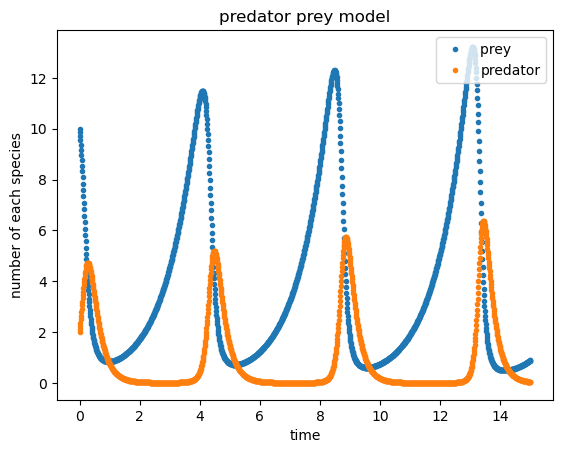

In [22]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")
plt.savefig('predator_prey.png')

Let's think a bit about what this solution means, what is going on here?

Interpretation:

The graph illustrates a classic predator-prey relationship, where the population sizes of both prey and predators fluctuate cyclically over time.

Key Observations:

Cyclic Behavior:  The populations of both species exhibit a repeating pattern. The prey population initially increases, followed by an increase in the predator population. As the predator population grows, it exerts more pressure on the prey, causing their numbers to decline. Subsequently, with less prey available, the predator population starts to decrease, and the cycle repeats.

Lag Effect:  The predator population always lags behind the prey population. This is because it takes time for the predator population to respond to changes in prey abundance.

Stability and Period:  The exact amplitude and period of the cycles depend on the specific parameters of the model (e.g., growth rates, interaction strengths). In a stable predator-prey system, the populations oscillate around a fixed point, indicating a balanced coexistence.

Possible Shifts: The image shows a relatively regular cyclic pattern, suggesting a stable relationship. However, in reality, various factors can influence this equilibrium. Environmental changes, disease outbreaks, or the introduction of new species can cause shifts in the dynamics, potentially leading to population crashes or extinctions.

Caveats:

The graph only shows the population dynamics under specific conditions.
The model assumes constant parameters, which may not hold true in complex natural ecosystems.

What happens if we start with different initial conditions? Like more prey and less predators.

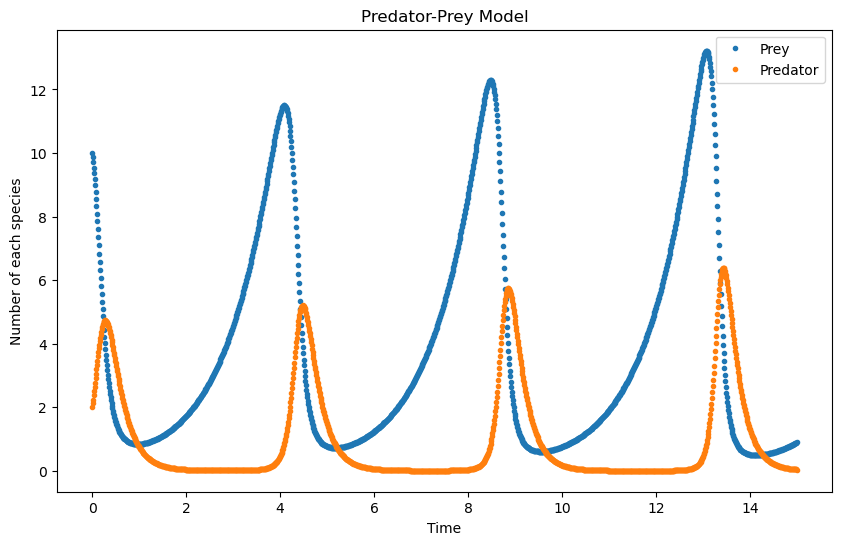

In [31]:

## Parameters
alpha = 1
beta = 1.2
gamma = 4
delta = 1

## Euler's Method
def euler_step(u, f, dt):
    """
    Returns the solution at the next time-step using Euler's method.
    
    Parameters:
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns:
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    return u + dt * f(u)

## Lotka-Volterra Equations
def f(u):
    """
    Returns the rate of change of species
    
    Parameters:
    ----------
    u : array of float
        array containing the solution at time n.
    
    Returns:
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

## Time Parameters
T = 15.0  # final time
dt = 0.01  # time-increment
N = int(T / dt) + 1  # number of time-steps

## Initial Conditions
x0 = 10  # initial prey amount
y0 = 2   # initial predator amount
t0 = 0   # initialize time

## Initialize Solution Array
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

## Time-Stepping
for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

## Plotting
time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(time, x_euler, '.', label='Prey')
plt.plot(time, y_euler, '.', label='Predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Number of each species")
plt.title("Predator-Prey Model")
plt.savefig('predator_prey_model.png')
plt.show()

Starting with different initial conditions, like more prey and fewer predators, will change the specific trajectory of the population cycles in the predator-prey model. However, the overall cyclic behavior and the underlying dynamics will remain the same.

Here's what we can expect:

Initial Phase:

With more prey initially, the predator population will experience rapid growth as they have ample food resources.
The prey population will initially decline due to increased predation pressure.
Intermediate Phase:

As the predator population continues to rise, it will exert even greater pressure on the prey, leading to a more significant decline in prey numbers.
However, with fewer prey, the predator population will eventually start to decline due to lack of food.
Later Phase:

As the predator population decreases, the prey population will have a chance to recover and start increasing again.
This renewed abundance of prey will then stimulate the predator population to grow once more.
Overall Behavior:

The system will still exhibit cyclic behavior, with the predator and prey populations oscillating around a stable equilibrium point.
The amplitude and period of these cycles may be different compared to the original scenario, depending on the specific initial conditions and model parameters.
The overall shape of the cycles will remain similar, with the predator population lagging behind the prey population.
Key Points:

The initial conditions determine the starting point of the cycle, but the underlying dynamics of the predator-prey relationship will drive the system towards its natural equilibrium.
In a stable system, the populations will eventually return to their equilibrium levels, regardless of the initial conditions.

What happened?

What if we start with the same amount of prey and predators?

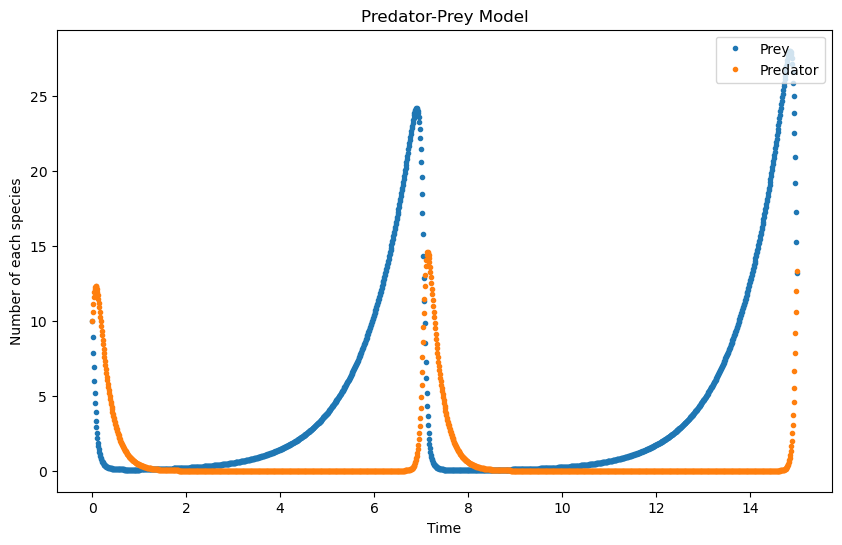

In [36]:
## Initial Conditions
x0 = 10  # initial prey amount
y0 = 10  # initial predator amount (changed from 2 to 10)
t0 = 0   # initialize time

## Initialize Solution Array
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])


#The rest of the code remains the same:


import numpy as np
import matplotlib.pyplot as plt

## Parameters
alpha = 1
beta = 1.2
gamma = 4
delta = 1

## Euler's Method
def euler_step(u, f, dt):
    """
    Returns the solution at the next time-step using Euler's method.
    
    Parameters:
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns:
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    return u + dt * f(u)

## Lotka-Volterra Equations
def f(u):
    """
    Returns the rate of change of species
    
    Parameters:
    ----------
    u : array of float
        array containing the solution at time n.
    
    Returns:
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

## Time Parameters
T = 15.0  # final time
dt = 0.01  # time-increment
N = int(T / dt) + 1  # number of time-steps

## Initial Conditions
x0 = 10  # initial prey amount
y0 = 10  # initial predator amount
t0 = 0   # initialize time

## Initialize Solution Array
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

## Time-Stepping
for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

## Plotting
time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(time, x_euler, '.', label='Prey')
plt.plot(time, y_euler, '.', label='Predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Number of each species")
plt.title("Predator-Prey Model")
plt.savefig('predator_prey_model_same_initial.png')
plt.show()

What happened?

Let's mess around with the model parameters. What if the prey grow faster?

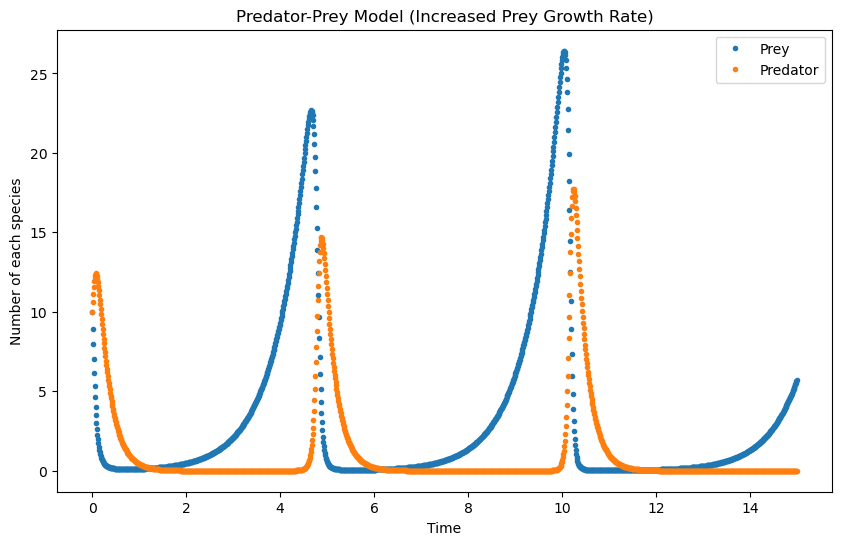

In [50]:

alpha = 1.5
beta = 1.2
gamma = 4
delta = 1


def euler_step(u, f, dt):
    return u + dt * f(u)


def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])


T = 15.0
dt = 0.01
N = int(T / dt) + 1


x0 = 10
y0 = 10
t0 = 0


u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])


for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)


time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(time, x_euler, '.', label='Prey')
plt.plot(time, y_euler, '.', label='Predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Number of each species")
plt.title("Predator-Prey Model (Increased Prey Growth Rate)")
plt.savefig('predator_prey_model_faster_prey.png')
plt.show()

What happened?

### 12.2.3 System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

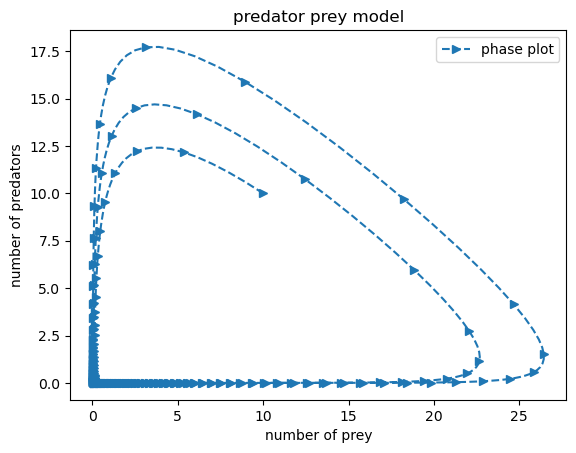

In [52]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 12.2

#### E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

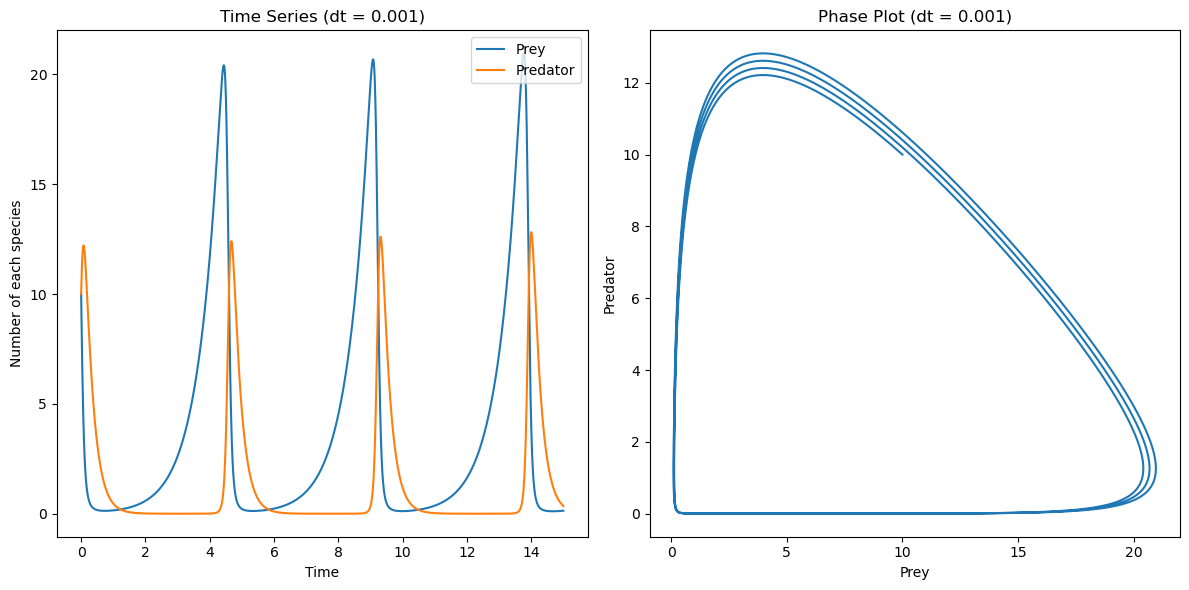

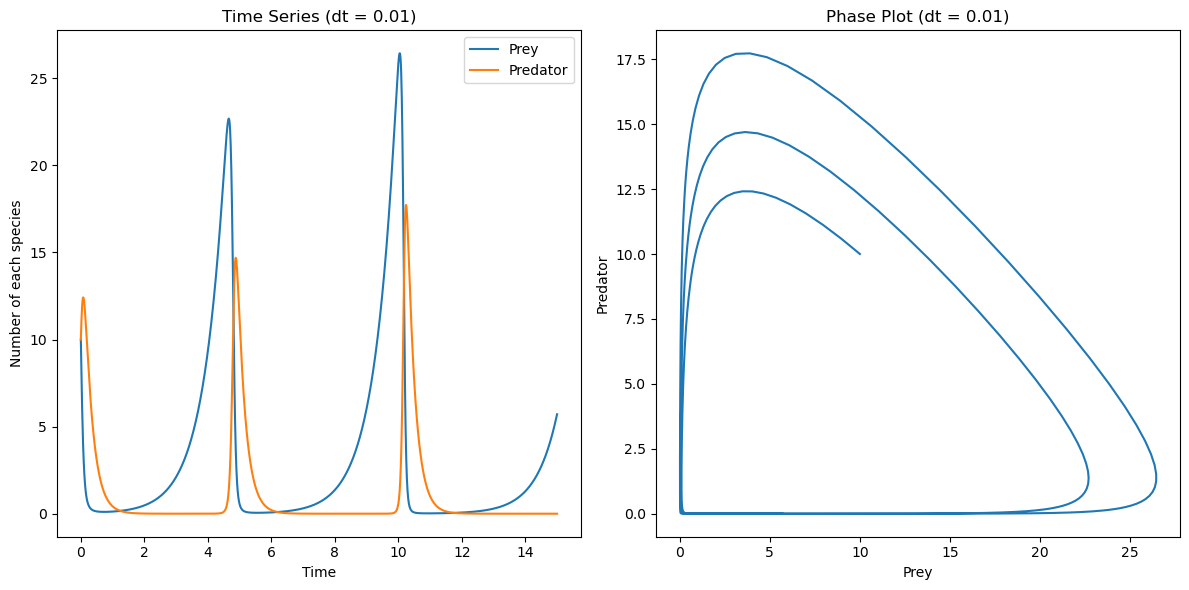

C:\Users\owhon\AppData\Local\Temp\ipykernel_17588\588025490.py:15: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])


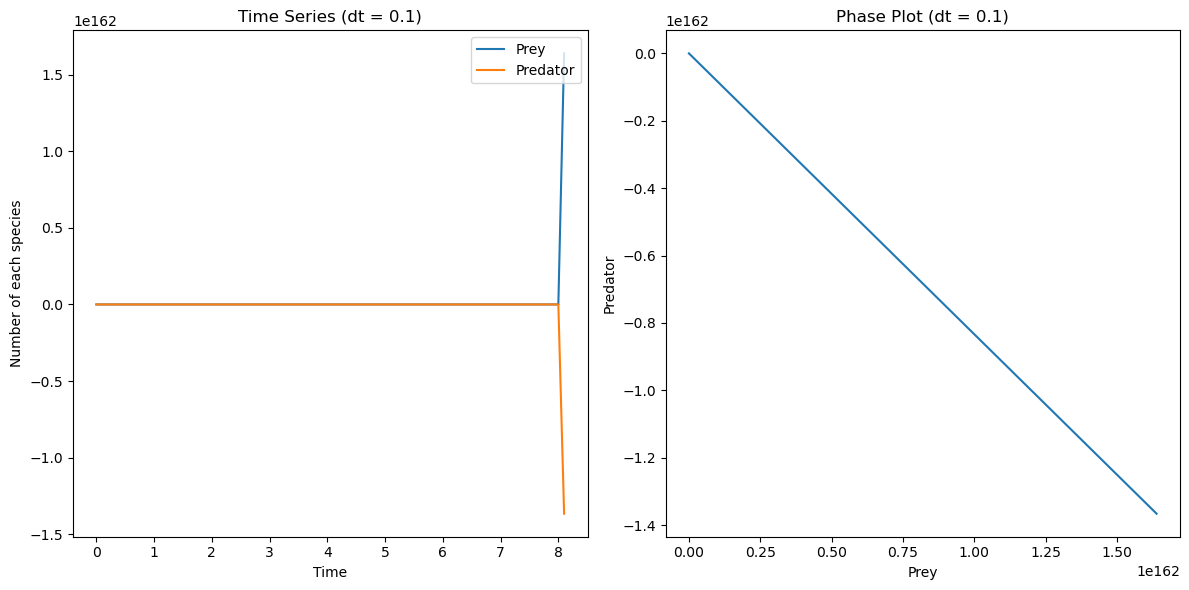

In [54]:

alpha = 1.5
beta = 1.2
gamma = 4
delta = 1


def euler_step(u, f, dt):
    return u + dt * f(u)


def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])


T = 15.0


x0 = 10
y0 = 10
t0 = 0



dts = [0.001, 0.01, 0.1]  

for dt in dts:
    N = int(T / dt) + 1
    u_euler = np.zeros((N, 2))
    u_euler[0] = np.array([x0, y0])

    for n in range(N - 1):
        u_euler[n + 1] = euler_step(u_euler[n], f, dt)

    time = np.linspace(0.0, T, N)
    x_euler = u_euler[:, 0]
    y_euler = u_euler[:, 1]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(time, x_euler, label='Prey')
    plt.plot(time, y_euler, label='Predator')
    plt.legend(loc='upper right')
    plt.xlabel("Time")
    plt.ylabel("Number of each species")
    plt.title(f"Time Series (dt = {dt})")

    plt.subplot(1, 2, 2)
    plt.plot(x_euler, y_euler)
    plt.xlabel("Prey")
    plt.ylabel("Predator")
    plt.title(f"Phase Plot (dt = {dt})")

    plt.tight_layout()
    plt.savefig(f'predator_prey_model_dt_{dt}.png')
    plt.show()


#### E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system using algebra. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot and plot it. What happens if you start at the steady state? What happens if you start near the steady state?

$\alpha x - \beta x y  = 0$

$\delta x y -\gamma y  = 0$



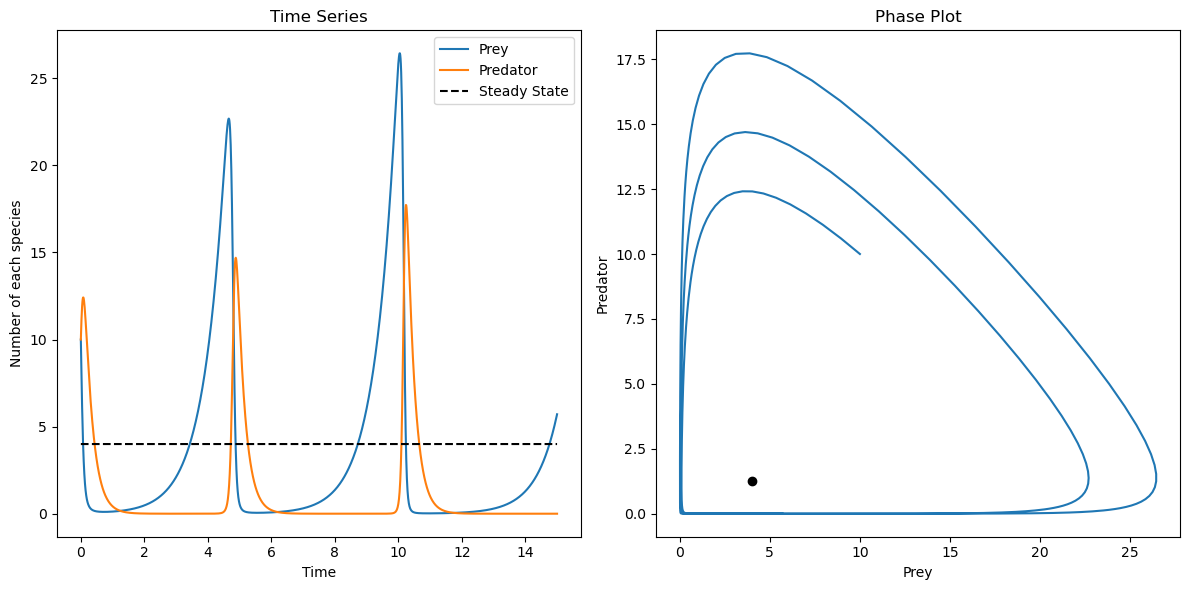

In [56]:

alpha = 1.5
beta = 1.2
gamma = 4
delta = 1


def euler_step(u, f, dt):
    return u + dt * f(u)


def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])


T = 15.0


x0 = 10
y0 = 10
t0 = 0



dt = 0.01
N = int(T / dt) + 1
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]


x_steady = gamma / delta
y_steady = alpha / beta

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time, x_euler, label='Prey')
plt.plot(time, y_euler, label='Predator')
plt.plot(time, x_steady * np.ones(N), 'k--', label='Steady State')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Number of each species")
plt.title("Time Series")

plt.subplot(1, 2, 2)
plt.plot(x_euler, y_euler)
plt.plot(x_steady, y_steady, 'ko')
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("Phase Plot")

plt.tight_layout()
plt.savefig('predator_prey_model_steady_state.png')
plt.show()

#### E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ? How does the dt, the timestep, affect your answer using this "higher order" algorithm?

In [66]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

#### E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

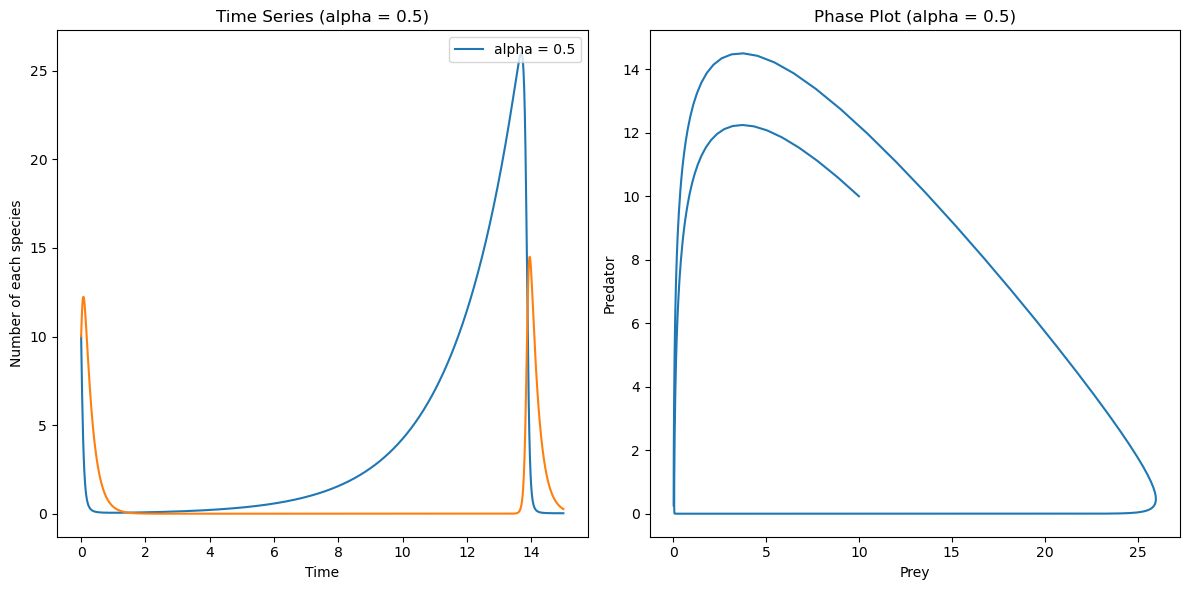

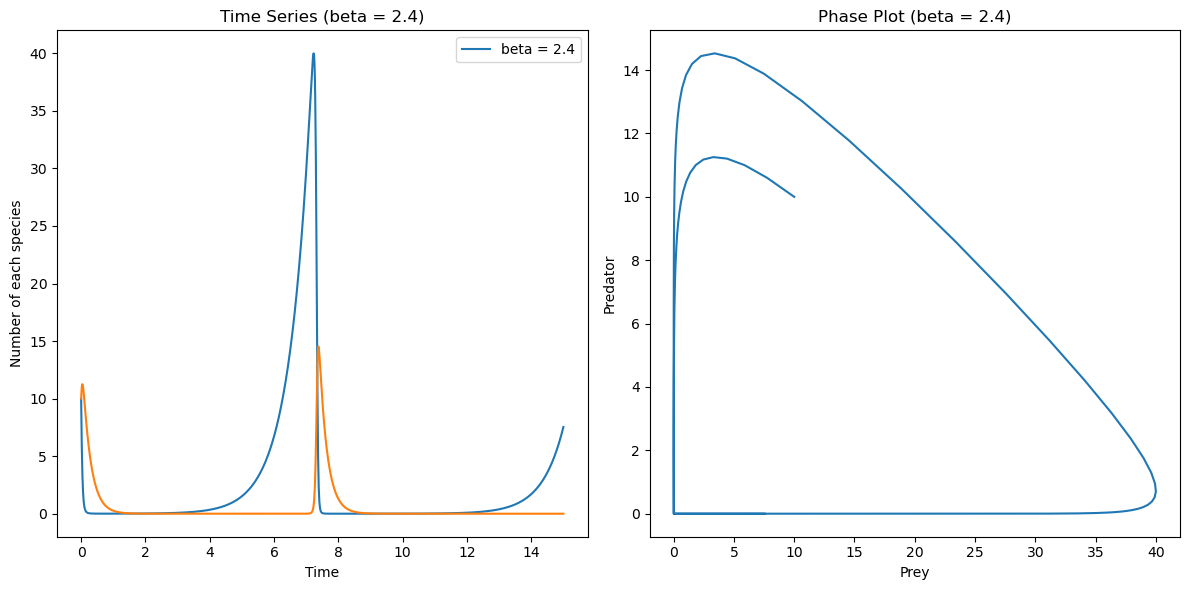

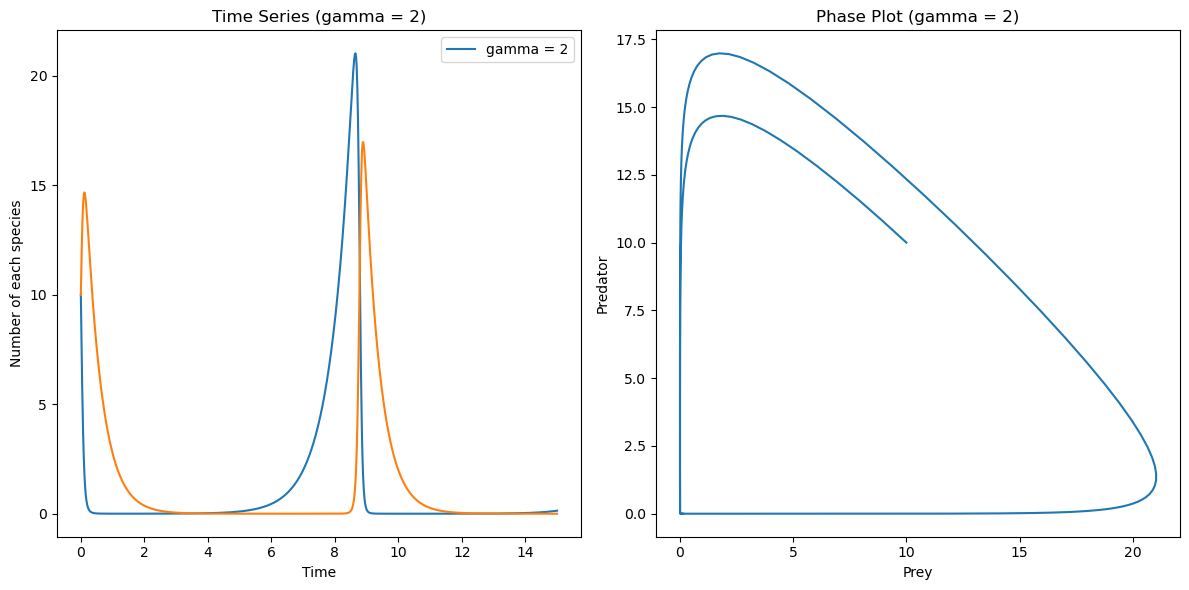

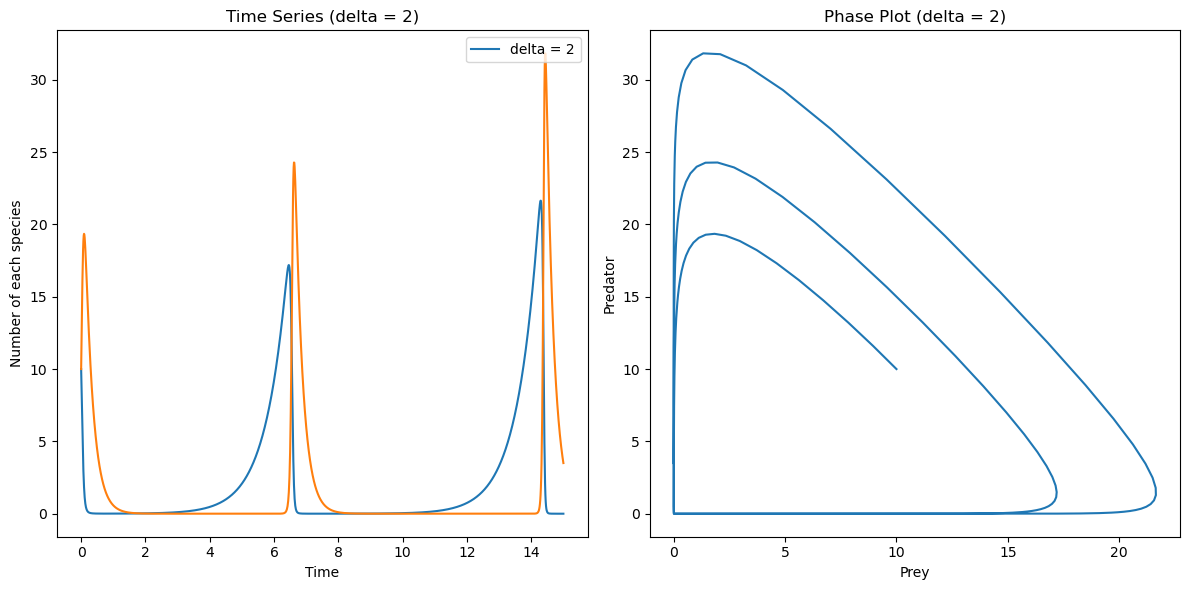

In [59]:

alpha = 1.5
beta = 1.2
gamma = 4
delta = 1


def euler_step(u, f, dt):
    return u + dt * f(u)


def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])


T = 15.0


x0 = 10
y0 = 10
t0 = 0


dt = 0.01
N = int(T / dt) + 1
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]

## Parameter Variation
params = ['alpha', 'beta', 'gamma', 'delta']
values = [0.5, 2.4, 2, 2]

for param, value in zip(params, values):
    exec(param + ' = ' + str(value))
    
    u_euler_param = np.zeros((N, 2))
    u_euler_param[0] = np.array([x0, y0])
    
    for n in range(N - 1):
        u_euler_param[n + 1] = euler_step(u_euler_param[n], f, dt)
        
    x_euler_param = u_euler_param[:, 0]
    y_euler_param = u_euler_param[:, 1]
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(time, x_euler_param, label=param + ' = ' + str(value))
    plt.plot(time, y_euler_param)
    plt.legend(loc='upper right')
    plt.xlabel("Time")
    plt.ylabel("Number of each species")
    plt.title("Time Series (" + param + ' = ' + str(value) + ')')
    
    plt.subplot(1, 2, 2)
    plt.plot(x_euler_param, y_euler_param)
    plt.xlabel("Prey")
    plt.ylabel("Predator")
    plt.title("Phase Plot (" + param + ' = ' + str(value) + ')')
    
    plt.tight_layout()
    plt.savefig('predator_prey_model_' + param + '_' + str(value) + '.png')
    plt.show()
    
    
    alpha = 1.5
    beta = 1.2
    gamma = 4
    delta = 1

#### E.5 (Advanced, required for grad students)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example linked above.

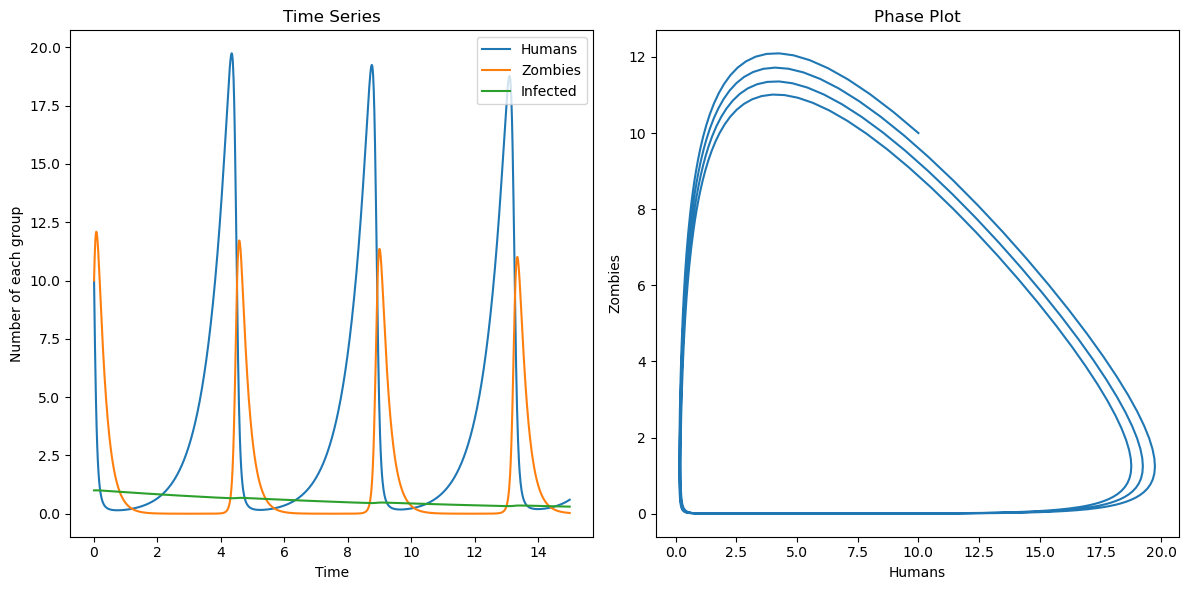

In [64]:

alpha = 1.5
beta = 1.2
gamma = 4
delta = 1
a = 0.01
zeta = 0.005
eta = 0.002
rho = 0.1


def equations(state, t):
    x, y, z = state
    dxdt = x * (alpha - beta * y) - zeta * x * z
    dydt = -y * (gamma - delta * x) - a * y**2
    dzdt = eta * x * y - rho * z
    return dxdt, dydt, dzdt


T = 15.0
dt = 0.01
N = int(T / dt) + 1


x0 = 10
y0 = 10
z0 = 1
state0 = [x0, y0, z0]


state = odeint(equations, state0, np.linspace(0, T, N))
x = state[:, 0]
y = state[:, 1]
z = state[:, 2]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, T, N), x, label='Humans')
plt.plot(np.linspace(0, T, N), y, label='Zombies')
plt.plot(np.linspace(0, T, N), z, label='Infected')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Number of each group")
plt.title("Time Series")

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.xlabel("Humans")
plt.ylabel("Zombies")
plt.title("Phase Plot")

plt.tight_layout()
plt.savefig('zombie_apocalypse_model.png')
plt.show()